# E-Commerce Product Delivery Prediction

### Problem Statement

The aim of this project is to predict whether products from an international e-commerce company will reach customers on time or not. 

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

### Information about Dataset

The dataset used for model building contained 10999 observations of 12 variables. The data contains the following information:


| Variable | Description |
| --- | --- |
|ID|ID Number of Customers|
|Warehouse_block|The Company have big Warehouse which is divided into block such as A,B,C,D,E|
|Mode_of_Shipment|The Company Ships the products in multiple way such as Ship, Flight and Road|
|Customer_care_calls|The number of calls made from enquiry for enquiry of the shipment|
|Customer_rating|The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)|
|Cost_of_the_Product|Cost of the Product in US Dollars|
|Prior_purchases|The Number of Prior Purchase|
|Product_importance|The company has categorized the product in the various parameter such as low, medium, high|
|Gender|Male and Female|
|Discount_offered|Discount offered on that specific product|
|Weight_in_gms|It is the weight in grams|
|Reached.on.Time_Y.N|It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time|

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [1]:
# Read Data
import numpy as np                     # For doing Numerical caluculation like mean, std, mode etc.,
import pandas as pd                    # for loading, reading and manipulation the data

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

<h2 style="color:blue" align="left"> 2. Loading dataset </h2>

In [2]:
df = pd.read_csv('E_Commerce.csv')
print(f'First 5 rows \n\n{df.head()}')

First 5 rows 

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1

In [3]:
# checking dimension (num of rows and columns) of dataset
print("data shape (Rows, Columns):",df.shape)

data shape (Rows, Columns): (10999, 12)


In [4]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


<h2 style="color:blue" align="left"> 3. EDA (Exploratory Data Analysis) </h2>

- EDA is a way of **Visualizing, Summarizing and interpreting** the information that is **hidden in rows and column** format.

<b> Find Unwanted Columns </b>

Currently there are no any unwanted columns in the dataset

<b> Find Missing Values </b>

In [5]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

No missing values in the dataset

<b> Explore categorical Features </b>

In [6]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
categorical_features

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

<b> Checking for unique values in Categorical_features </b>

In [7]:
print(df['Warehouse_block'].unique())
print(df['Mode_of_Shipment'].unique())
print(df['Product_importance'].unique())
print(df['Gender'].unique())

['D' 'F' 'A' 'B' 'C']
['Flight' 'Ship' 'Road']
['low' 'medium' 'high']
['F' 'M']


In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
numerical_features

['ID',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

<b> Find Outliers in numerical features </b>

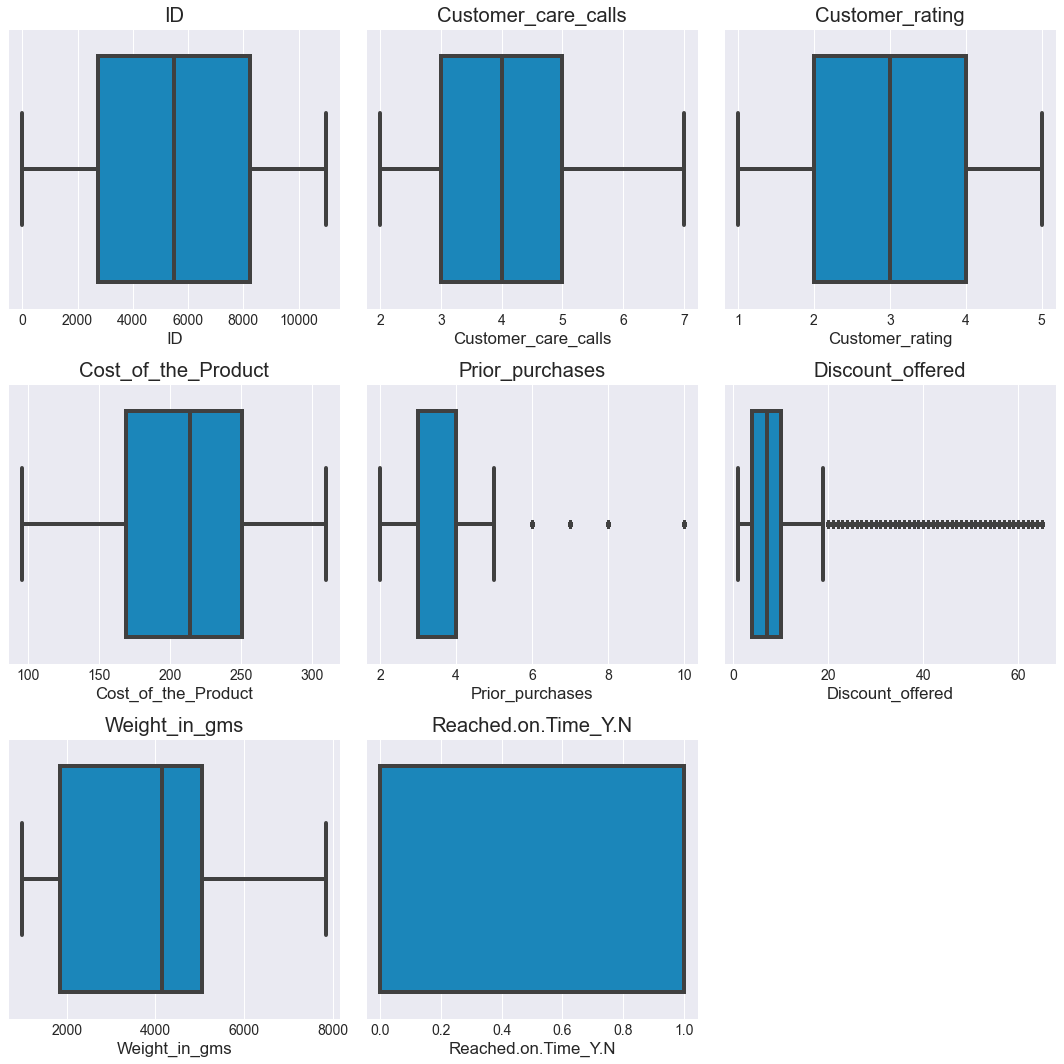

In [9]:
# Get the names of all columns with data type 'int'
num_vars = [feature for feature in numerical_features]

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<h2 style="color:blue" align="left"> 4. Descriptive Statistics  </h2>

In [10]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [11]:
df.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


<h2 style="color:blue" align="left"> 5. Data Visualization </h2>

### 1. Univariate Analysis

- Univariate Analysis : data consists of **only one variable (only x value)**.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Warehouse Block

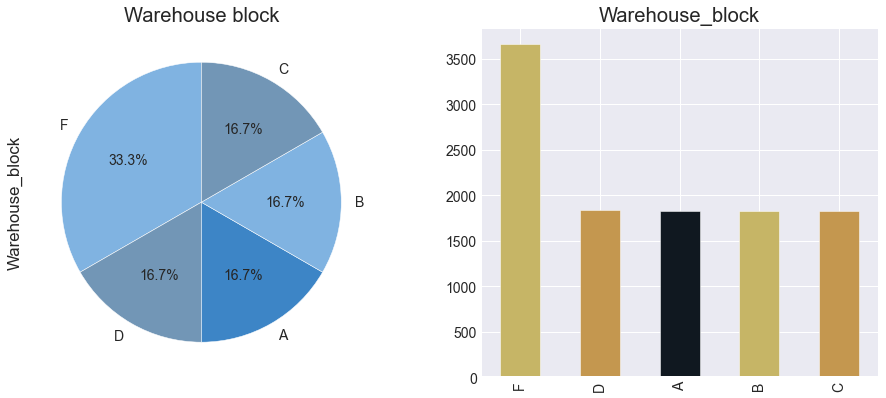

In [13]:
f,ax = plt.subplots(1,2,figsize=(14,6))

df['Warehouse_block'].value_counts().plot(kind='pie',autopct='%4.1f%%',colors = ['#80B3E1', '#7296B6', '#3D85C6'], startangle=90,ax=ax[0])
ax[0].set_title('Warehouse block')

df['Warehouse_block'].value_counts().plot.bar(color=['#C6B566', '#C4974F', '#101820'], ax=ax[1])
ax[1].set_title('Warehouse_block')

plt.show()

##### Block F is most used warehouse

### Mode of Shipment

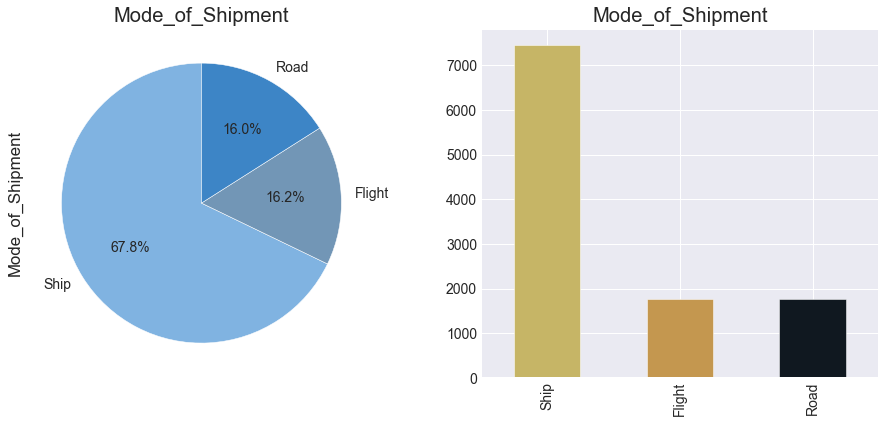

In [14]:
f,ax = plt.subplots(1,2,figsize=(14,6))

df['Mode_of_Shipment'].value_counts().plot(kind='pie',autopct='%4.1f%%',colors = ['#80B3E1', '#7296B6', '#3D85C6'], startangle=90,ax=ax[0])
ax[0].set_title('Mode_of_Shipment')

df['Mode_of_Shipment'].value_counts().plot.bar(color=['#C6B566', '#C4974F', '#101820'], ax=ax[1])
ax[1].set_title('Mode_of_Shipment')

plt.show()

##### Tranit through ship is most used

### Customer care calls

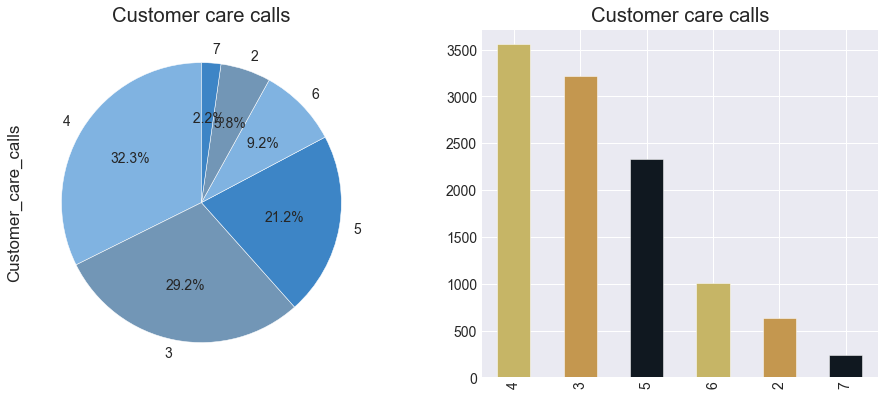

In [15]:
f,ax = plt.subplots(1,2,figsize=(14,6))

df['Customer_care_calls'].value_counts().plot(kind='pie',autopct='%4.1f%%',colors = ['#80B3E1', '#7296B6', '#3D85C6'], startangle=90,ax=ax[0])
ax[0].set_title('Customer care calls')

df['Customer_care_calls'].value_counts().plot.bar(color=['#C6B566', '#C4974F', '#101820'], ax=ax[1])
ax[1].set_title('Customer care calls')

plt.show()

### Customer rating

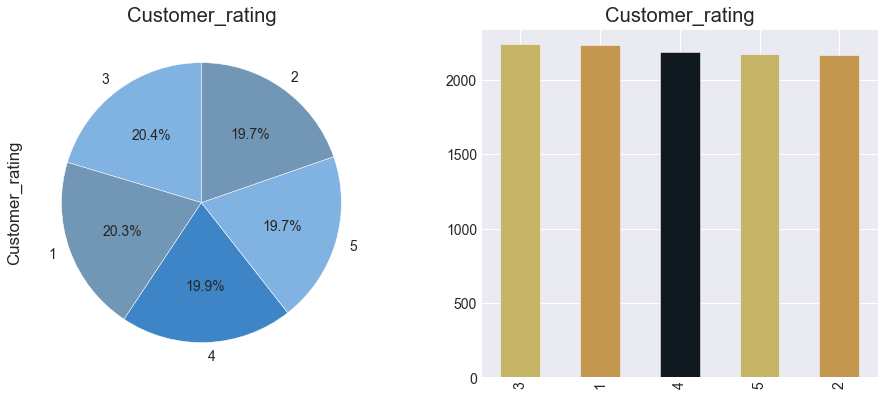

In [16]:
f,ax = plt.subplots(1,2,figsize=(14,6))

df['Customer_rating'].value_counts().plot(kind='pie',autopct='%4.1f%%',colors = ['#80B3E1', '#7296B6', '#3D85C6'], startangle=90,ax=ax[0])
ax[0].set_title('Customer_rating')

df['Customer_rating'].value_counts().plot.bar(color=['#C6B566', '#C4974F', '#101820'], ax=ax[1])
ax[1].set_title('Customer_rating')

plt.show()

### Cost of the Product

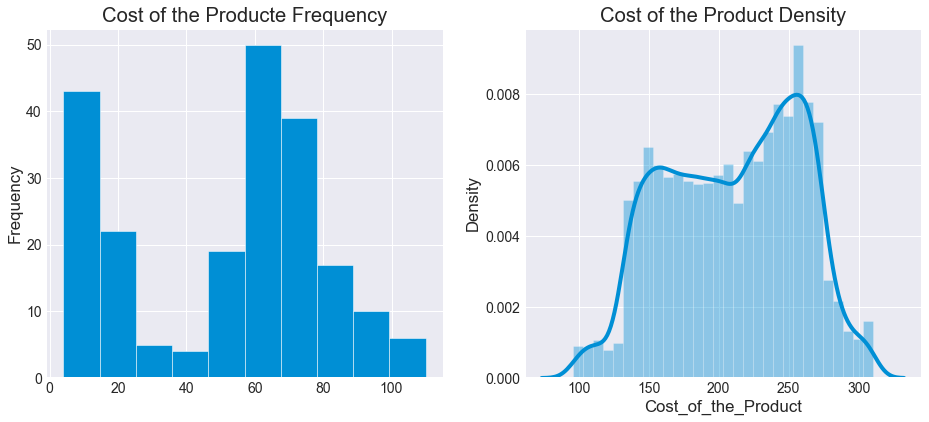

In [17]:
f,ax = plt.subplots(1,2, figsize=(14,6))

df['Cost_of_the_Product'].value_counts().plot(kind='hist',ax=ax[0])
ax[0].set_title('Cost of the Producte Frequency')

sns.distplot(df['Cost_of_the_Product'],kde=True,ax=ax[1])
ax[1].set_title('Cost of the Product Density')

plt.show()

<AxesSubplot:xlabel='Cost_of_the_Product'>

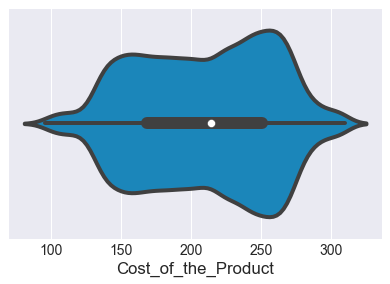

In [18]:
sns.violinplot(x='Cost_of_the_Product', data=df)

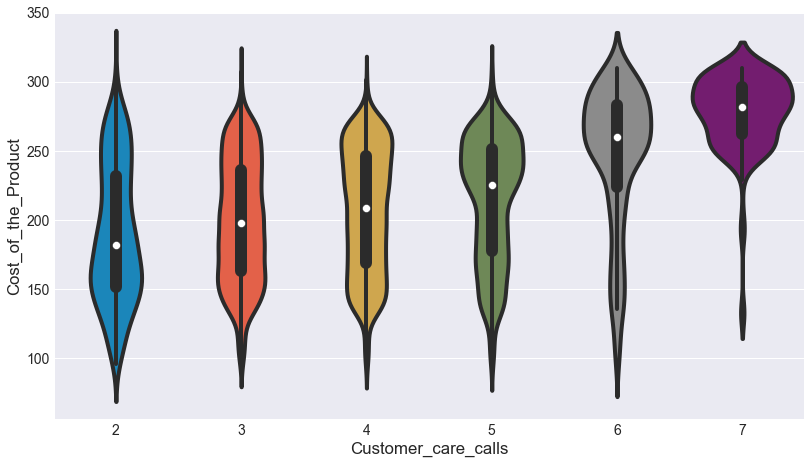

In [20]:
plt.figure(figsize=(12,7))
sns.violinplot(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data = df)
plt.show()

### Prior_purchases

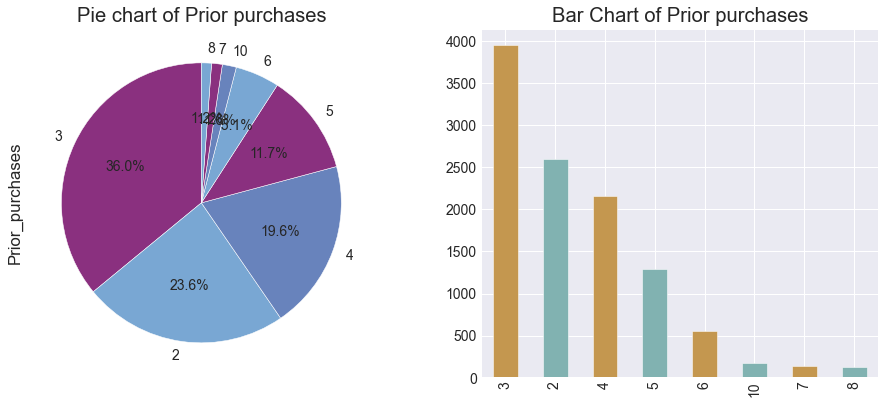

In [21]:
f,ax = plt.subplots(1,2,figsize=(14,6))

df['Prior_purchases'].value_counts().plot(kind='pie',autopct='%4.1f%%',colors = ['#8A307F','#79A7D3', '#6883BC'],startangle=90,ax=ax[0])
ax[0].set_title('Pie chart of Prior purchases')

df['Prior_purchases'].value_counts().plot.bar(color=['#C4974F', '#81B2B1'], ax=ax[1])
ax[1].set_title('Bar Chart of Prior purchases')

plt.show()

### Product importance

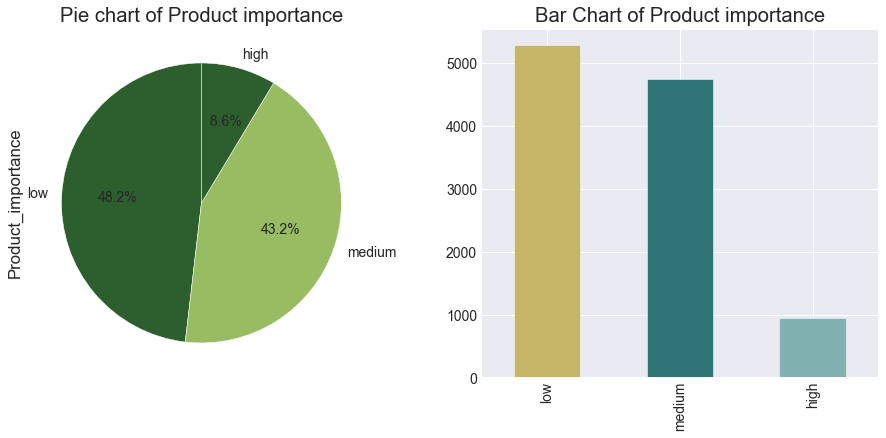

In [22]:
f,ax = plt.subplots(1,2,figsize=(14,6))

df['Product_importance'].value_counts().plot(kind='pie',autopct='%4.1f%%',colors = ['#2C5F2D','#97BC62'], startangle=90,ax=ax[0])
ax[0].set_title('Pie chart of Product importance')

df['Product_importance'].value_counts().plot.bar(color=['#C6B566', '#2F7576', '#81B2B1'], ax=ax[1])
ax[1].set_title('Bar Chart of Product importance')

plt.show()

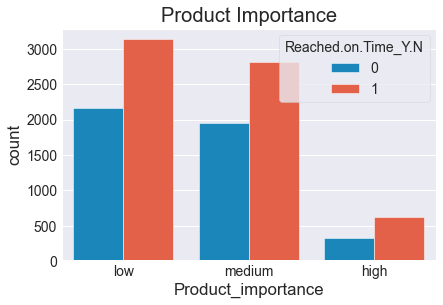

In [23]:
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N',data=df).set_title('Product Importance')
plt.show()

### Gender

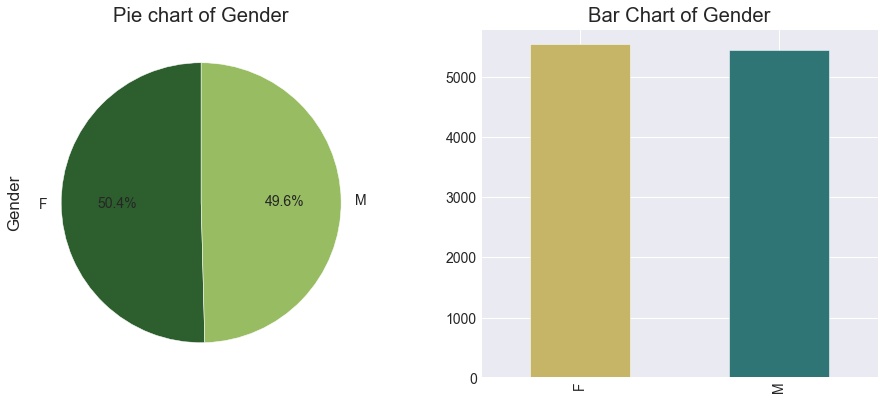

In [24]:
f,ax = plt.subplots(1,2,figsize=(14,6))

df['Gender'].value_counts().plot(kind='pie',autopct='%4.1f%%',colors = ['#2C5F2D','#97BC62'], startangle=90,ax=ax[0])
ax[0].set_title('Pie chart of Gender')

df['Gender'].value_counts().plot.bar(color=['#C6B566', '#2F7576', '#81B2B1'], ax=ax[1])
ax[1].set_title('Bar Chart of Gender')

plt.show()

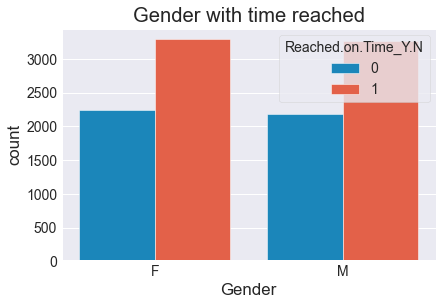

In [25]:
sns.countplot(x='Gender', hue='Reached.on.Time_Y.N', data=df).set_title('Gender with time reached')
plt.show()

### Discount offered

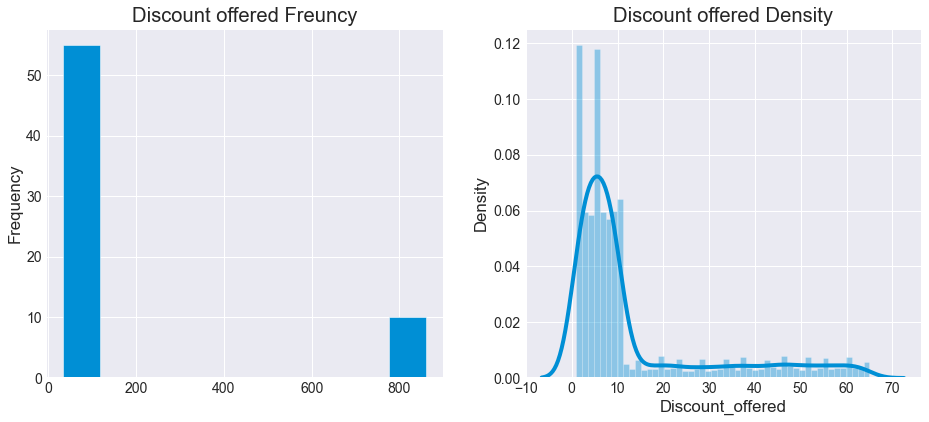

In [26]:
f,ax = plt.subplots(1,2, figsize=(14,6))

df['Discount_offered'].value_counts().plot(kind='hist',ax=ax[0])
ax[0].set_title('Discount offered Freuncy')

sns.distplot(df['Discount_offered'],ax=ax[1])
ax[1].set_title('Discount offered Density')

plt.show()

### Weight in gms

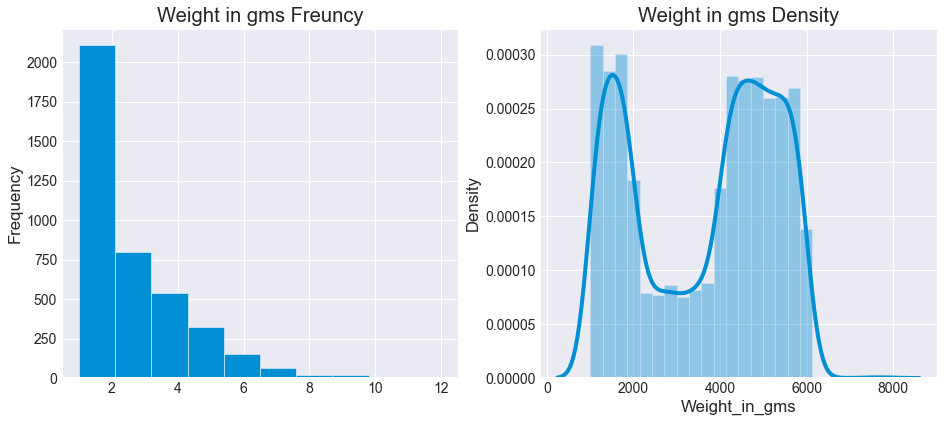

In [27]:
f,ax = plt.subplots(1,2, figsize=(14,6))

df['Weight_in_gms'].value_counts().plot(kind='hist',ax=ax[0])
ax[0].set_title('Weight in gms Freuncy')

sns.distplot(df['Weight_in_gms'],ax=ax[1])
ax[1].set_title('Weight in gms Density')

plt.show()

### Product Reched on Time : YES or NO

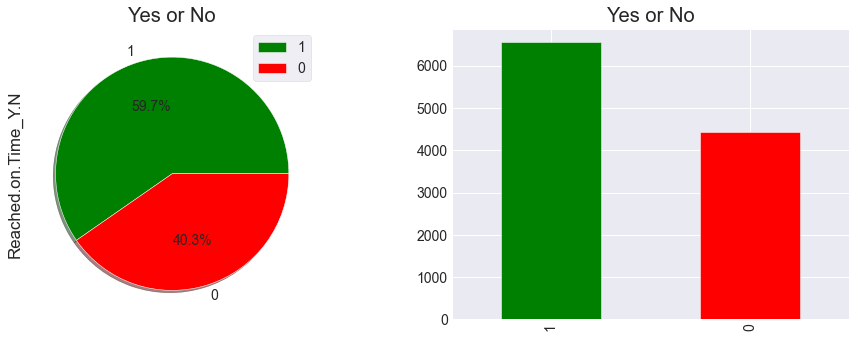

In [28]:
f,ax = plt.subplots(1,2,figsize=(14,5))

df['Reached.on.Time_Y.N'].value_counts().plot.pie(autopct='%4.1f%%', shadow = True, colors = ['green', 'red'],ax=ax[0])
ax[0].set_title('Yes or No')
ax[0].legend()

df['Reached.on.Time_Y.N'].value_counts().plot.bar(color=['green', 'red'], ax=ax[1])
ax[1].set_title('Yes or No')

plt.show()

### 2. Bivariate Analysis

- **Bivariate Analysis** : data involves **two different variables**.

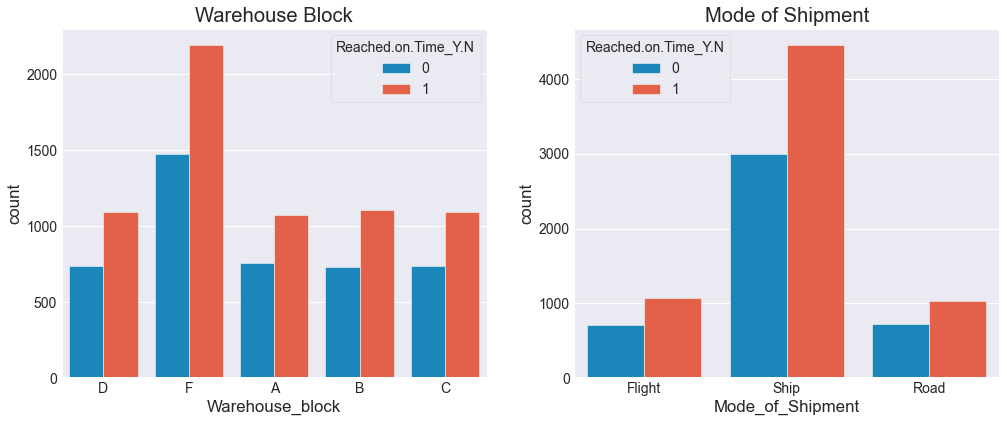

In [29]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')

plt.show()

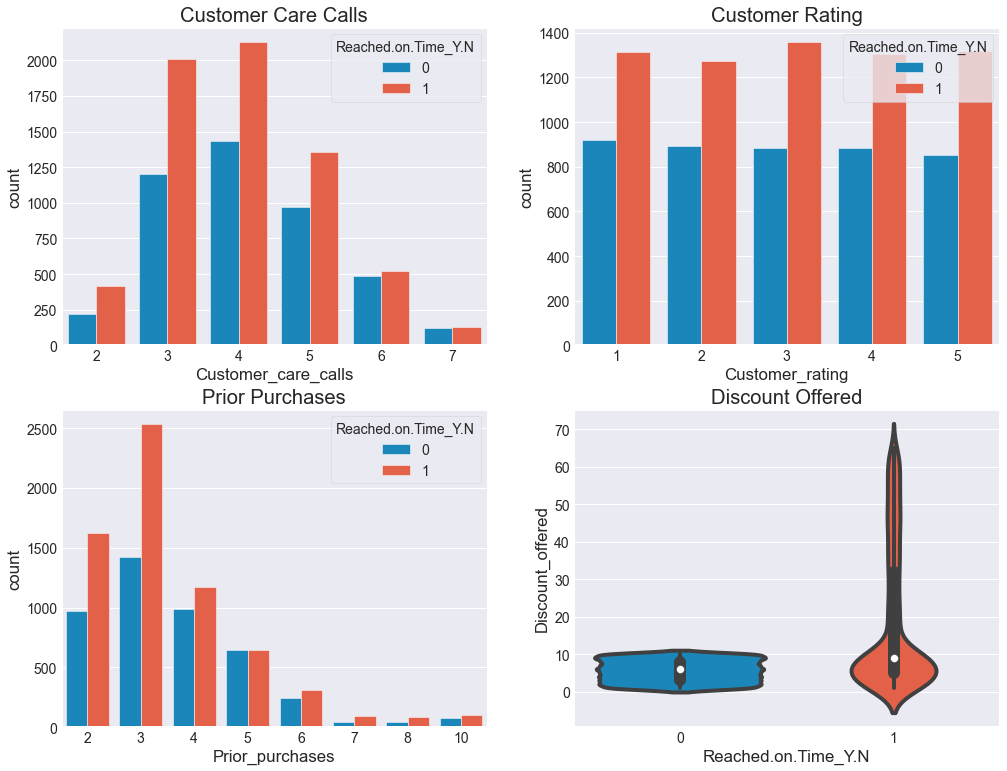

In [30]:
fig, ax = plt.subplots(2,2,figsize=(15,12))

sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1]).set_title('Discount Offered')

plt.show()

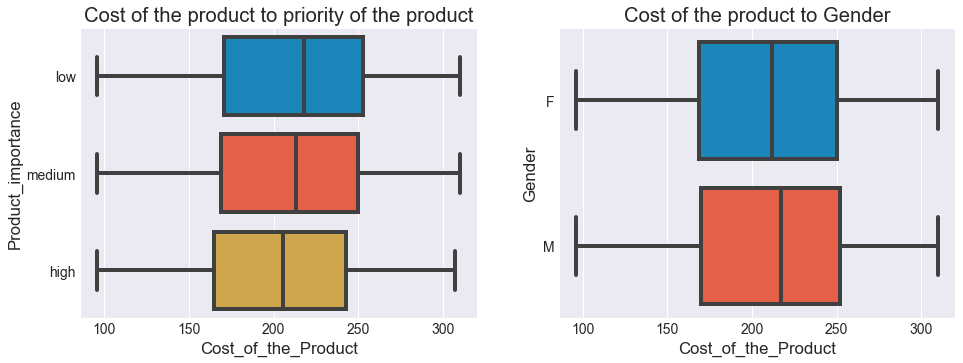

In [31]:
f,ax = plt.subplots(1,2,figsize=(14,5))

sns.boxplot(x='Cost_of_the_Product',y='Product_importance',data=df,ax=ax[0])
ax[0].set_title('Cost of the product to priority of the product')

sns.boxplot(x='Cost_of_the_Product', y='Gender',data=df, ax=ax[1])
ax[1].set_title('Cost of the product to Gender')

plt.show()

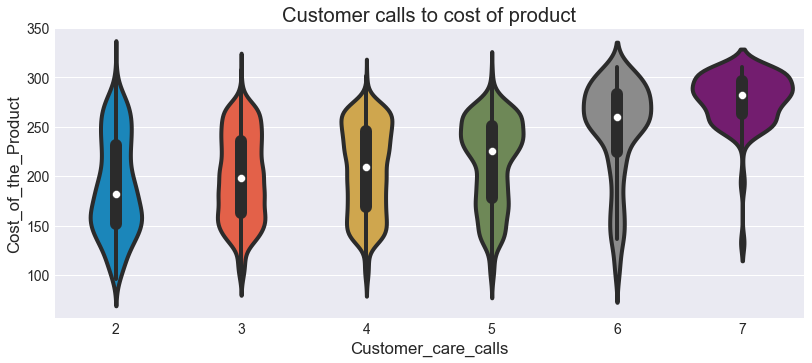

In [32]:
plt.figure(figsize=(12,5))
sns.violinplot(x='Customer_care_calls', y='Cost_of_the_Product',data=df)
plt.title('Customer calls to cost of product')
plt.show()

In [33]:
pd.crosstab(df['Prior_purchases'],df['Reached.on.Time_Y.N'], margins=True).T.style.background_gradient(cmap='summer_r')

Prior_purchases,2,3,4,5,6,7,8,10,All
Reached.on.Time_Y.N,,,,,,,,,
0,974,1421,984,645,247,44,45,76,4436
1,1625,2534,1171,642,314,92,83,102,6563
All,2599,3955,2155,1287,561,136,128,178,10999


In [34]:
pd.crosstab(df['Customer_care_calls'],df['Reached.on.Time_Y.N'],margins=True).T.style.background_gradient(cmap='summer_r')

Customer_care_calls,2,3,4,5,6,7,All
Reached.on.Time_Y.N,,,,,,,
0,222,1206,1431,968,490,119,4436
1,416,2011,2126,1360,523,127,6563
All,638,3217,3557,2328,1013,246,10999


### 3. Multivariate Analysis

- **Multivariate Analysis** : data involves **multiple different variables**.

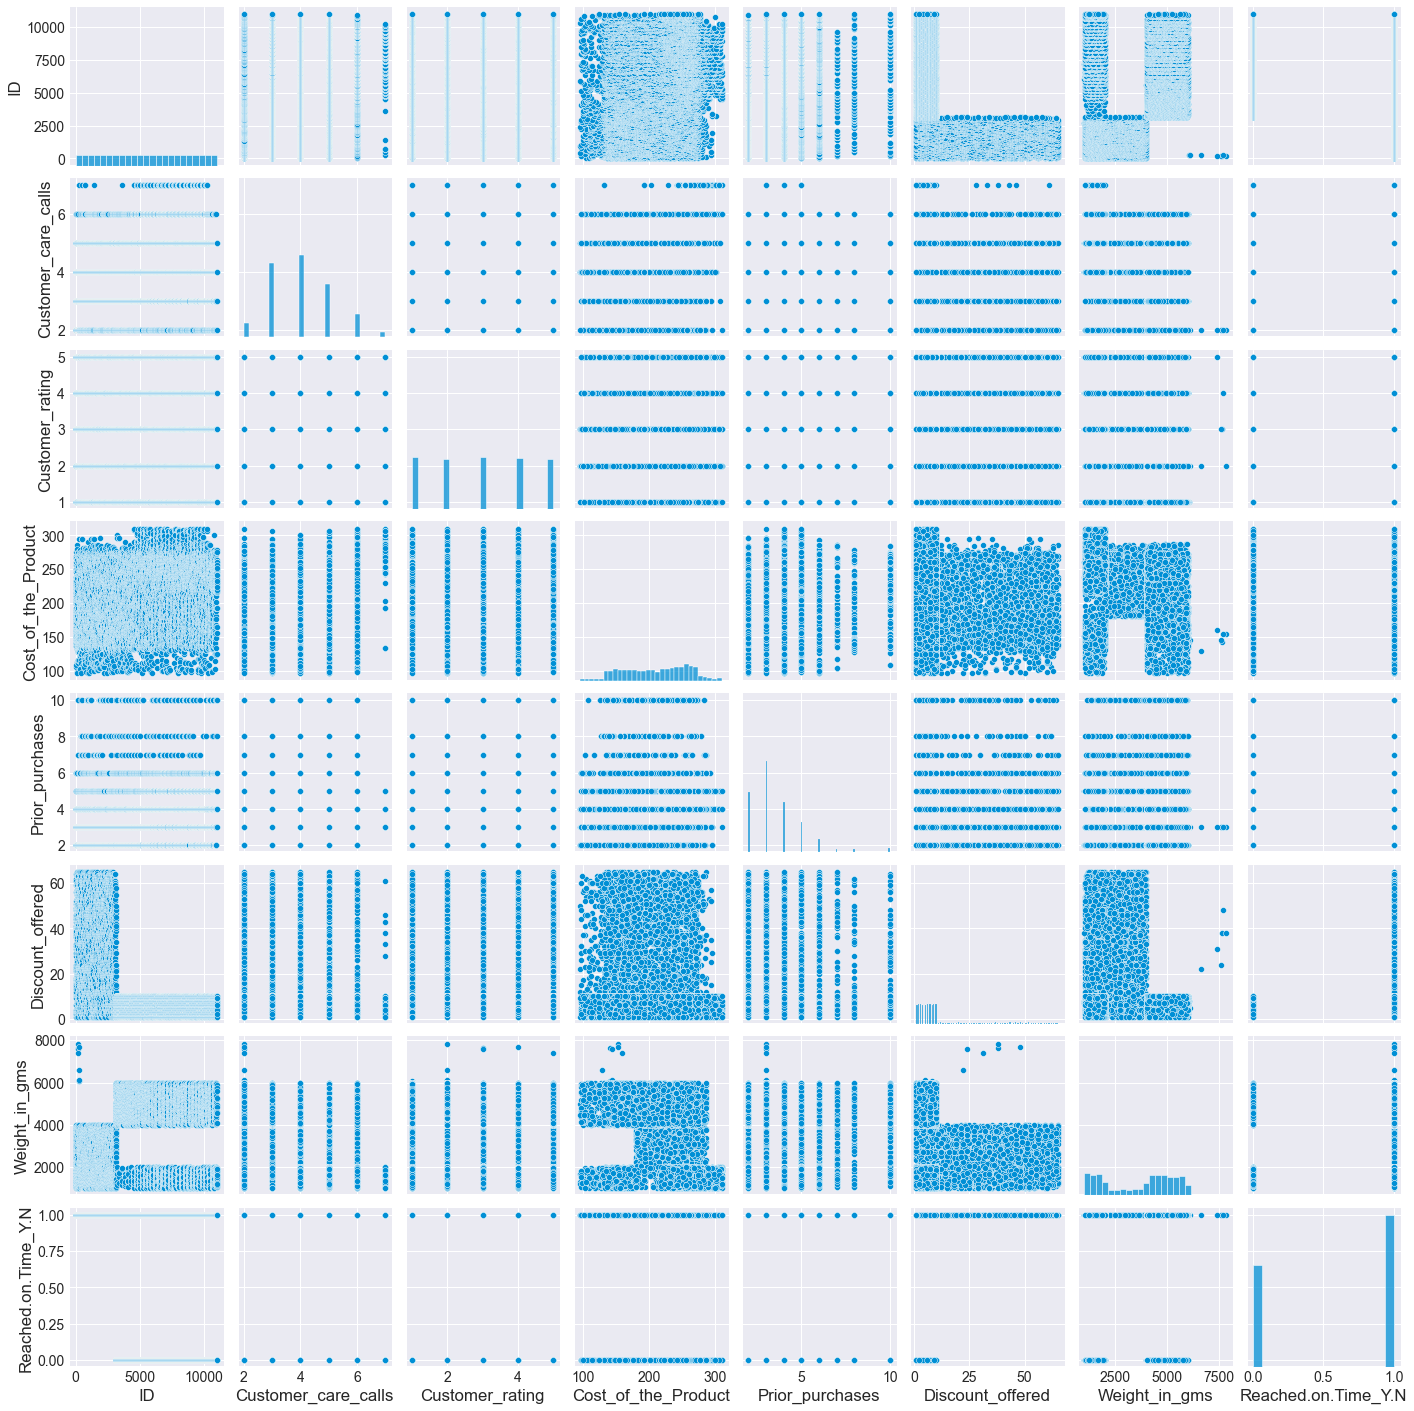

In [35]:
sns.pairplot(df)
plt.show()

<h2 style="color:blue" align="left"> 6. Feature Engineering </h2>

In [36]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

##### Taking the required columns for the prediction

In [37]:
final_dataset=df[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls','Customer_rating', 'Cost_of_the_Product', 
                  'Prior_purchases','Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms','Reached.on.Time_Y.N']]
final_dataset.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


##### Applying One Hot Encoding to the dataset to remove categorical variables

In [38]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
1,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
2,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
3,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
4,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0


##### Explore the Correlation between numerical features

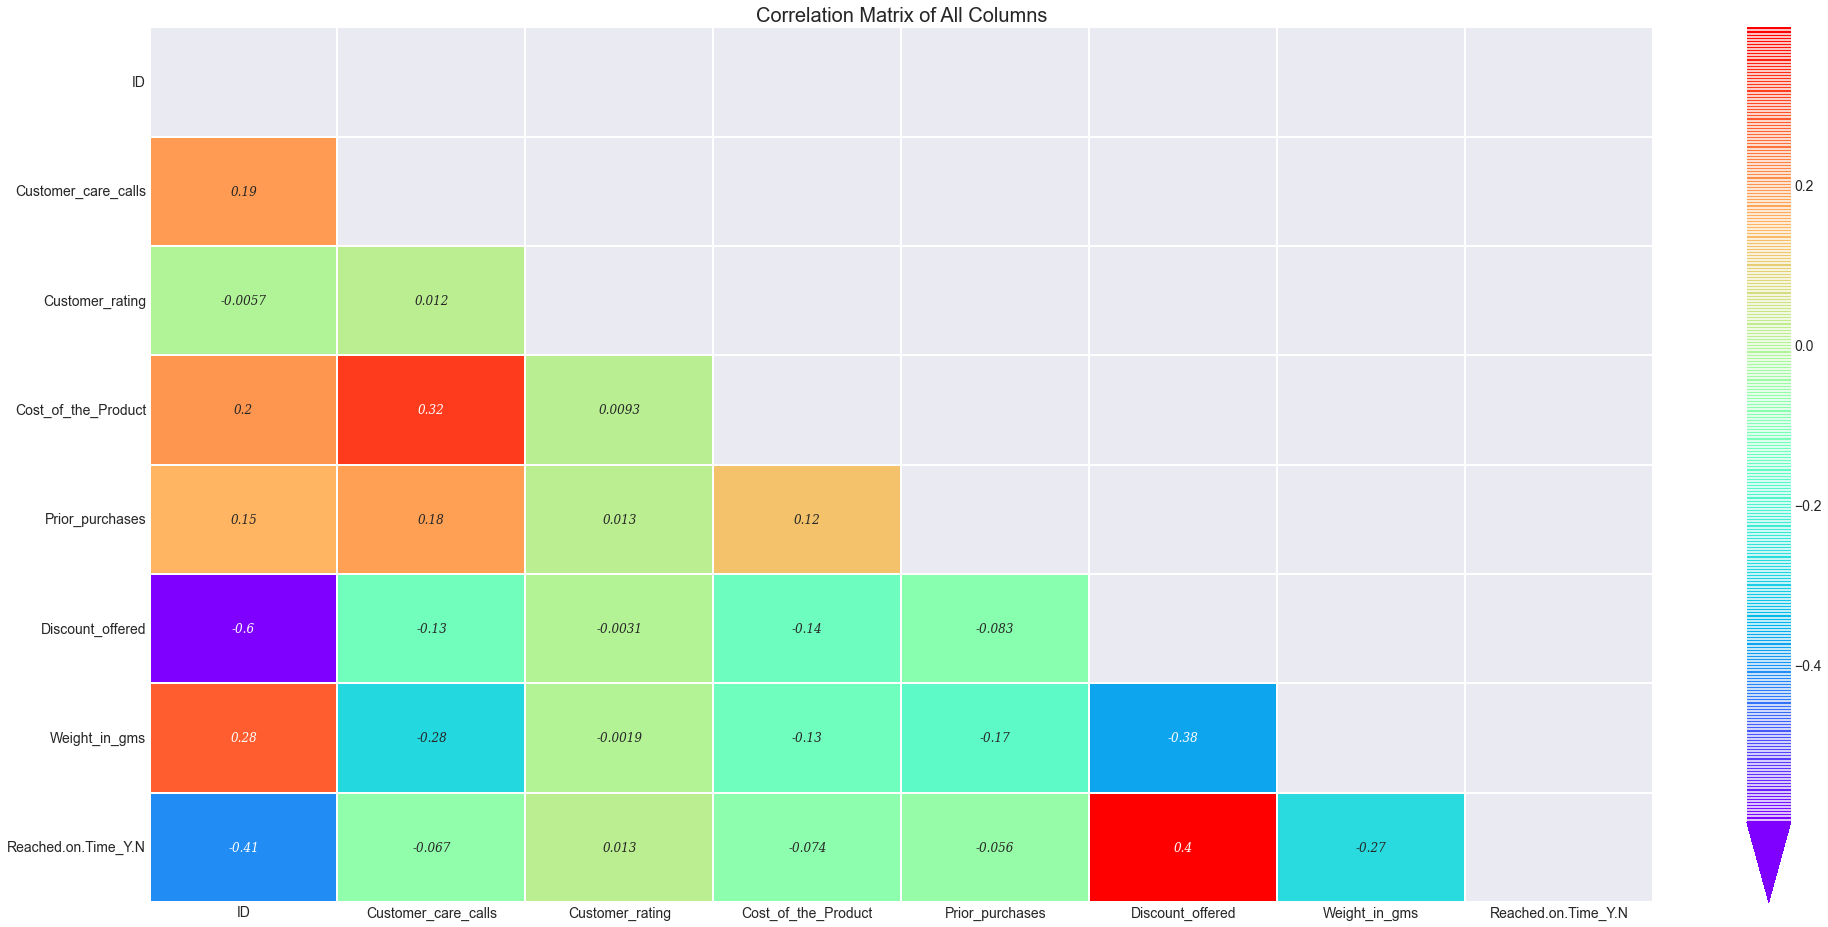

In [39]:
# Define the figure size
plt.figure(figsize = (30,15))

# Cutomize the annot
annot_kws={'fontsize':12,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, 
                 cmap = 'rainbow', annot = True, linewidth = 1.5,
                 annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix of All Columns', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

In [40]:
y = final_dataset['Reached.on.Time_Y.N']
X = final_dataset

In [41]:
X.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
1,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
2,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
3,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
4,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0


In [42]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

#### Splitting dataset into X_train, X_test, y_train, y_test

In [43]:
from sklearn.model_selection import train_test_split #importing train_test_split
#spliting into X_train,X_test,y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [44]:
#Training Data
print("X_train", X_train.shape)
print("y_train", y_train.shape)

#Testing Data
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (7699, 16)
y_train (7699,)
X_test (3300, 16)
y_test (3300,)


In [45]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [46]:
print(model.feature_importances_)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<h2 style="color:blue" align="left"> 7. Building the Model </h2>

## Model Building

I will be using the following models to predict the product delivery:

- Random Forest Classifier
- Decision Tree Classifier
- Logistic Regression
- K Nearest Neighbors

##### Random Forest Classifier 

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier()

In [49]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'max_depth': [4,8,12],
    'min_samples_leaf': [2,4,6],
    'min_samples_split': [2,4,6],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [50]:
#Random Forest Classifier Object
rfc = RandomForestClassifier(criterion='gini', max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, random_state=0)

In [51]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train, y_train))

Training accuracy:  1.0


In [52]:
#Testing accuracy
print('Testing accuracy: ', rfc.score(X_test, y_test))

Testing accuracy:  1.0


In [53]:
#predicting the test set results
rfc_pred = rfc.predict(X_test)

##### Decision Tree Classifier 

In [54]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()

In [55]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Parameter grid
param_grid = {
    'max_depth': [2,4,6],
    'min_samples_leaf': [2,4,6],
    'min_samples_split': [2,4,6],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

#GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [56]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=0, class_weight='balanced')

#Fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                       random_state=0)

In [57]:
#Training accuracy
print('Training accuracy: ', dtc.score(X_train, y_train))

Training accuracy:  1.0


In [58]:
#Testing accuracy
print('Testing accuracy: ', dtc.score(X_test, y_test))

Testing accuracy:  1.0


In [59]:
#predicting the test set results
dtc_pred = dtc.predict(X_test)

##### Logistic Classifier

In [60]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression()

In [61]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Parameter grid
param_grid = {
    'C': [0.001,0.01,0.1,1,10],
    'random_state': [0,42]}

#GridSearchCV object
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  {'C': 0.01, 'random_state': 0}


In [68]:
#Logistic Regression Object
lr = LogisticRegression(C=0.01, random_state=0, class_weight='balanced')

#Fitting the model
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', random_state=0)

In [69]:
#Training accuracy
print('Training accuracy: ', lr.score(X_train, y_train))

Training accuracy:  1.0


In [70]:
#Testing accuracy
print('Testing accuracy: ', lr.score(X_test, y_test))

Testing accuracy:  1.0


In [71]:
#predicting the test set results
lr_pred = lr.predict(X_test)

##### KNN Classifier 

In [72]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

In [74]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Parameter grid
param_grid = {
    'n_neighbors': [1,3,5,7],
    'metric':['minkowski','euclidean','manhattan']}

#GridSearchCV object
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 5}


In [75]:
#KNN Classifier Object
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

#Fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [76]:
#training accuracy
knn.score(X_train, y_train)

0.8188076373555007

In [77]:
#Testing accuracy
print('Testing accuracy: ', knn.score(X_test, y_test))

Testing accuracy:  0.693939393939394


In [78]:
#predicting the test set results
knn_pred = knn.predict(X_test)

<h2 style="color:blue" align="left"> 8. Model Evaluation </h2>

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

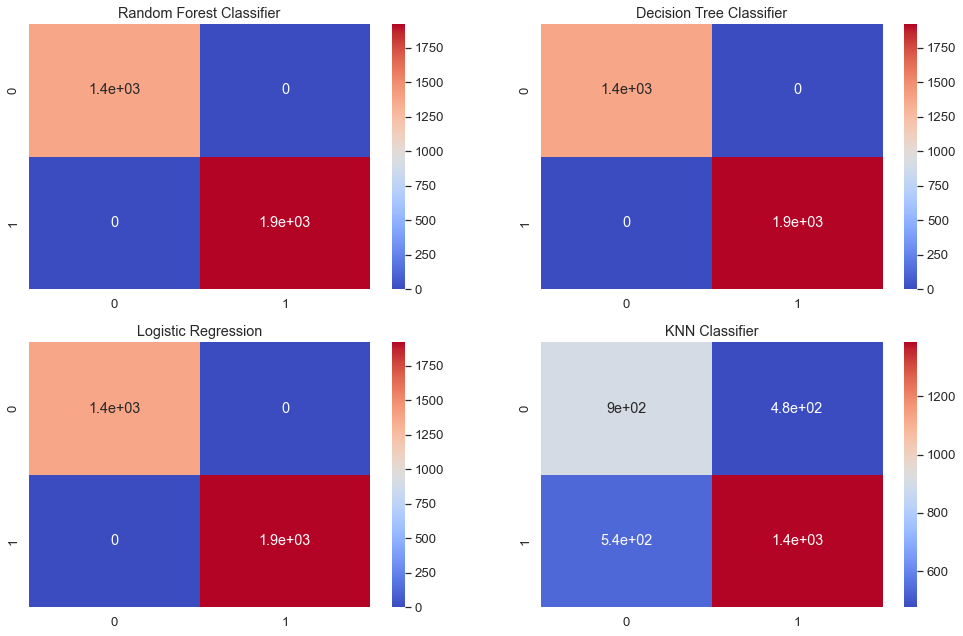

In [80]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')
plt.show()

In [81]:
#classification report
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('KNN Classifier: \n', classification_report(y_test, knn_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1379
           1       1.00      1.00      1.00      1921

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1379
           1       1.00      1.00      1.00      1921

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300

Logistic Regression: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1379
           1       1.00      1.00      1.00      1921

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      

##### Model Comparision

Text(0, 0.5, 'Accuracy')

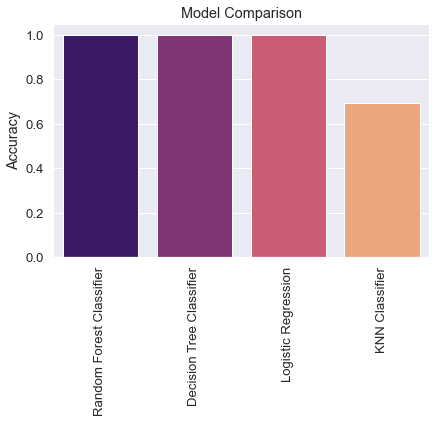

In [82]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

<h2 style="color:blue" align="left"> 9. Conclusion </h2>

The aim of the project was to predict whether the product from an e-commerce company will reach on time or not. This project also analyzes various factors that affect the delivery of the product as well as studies the customer behavior. From the exploratory data analysis, I found that the product weight and cost has an impact on the product delivery. Where product that weighs between 2500 - 3500 grams and having cost less than 250 dollars had higher rate of being delivered on time. Most of the products were shipped from warehouse F though ship, so it is quite possible that warehouse F is close to a seaport.

The customer's behaviour also help in predicting the timely delivery of the product. The more the customer calls, higher the chances the product delivery is delayed. Interestingly, the customers who have done more prior purchases have higher count of products delivered on time and this is the reason that they are purchasing again from the company. The products that have 0-10% discount have higher count of products delivered late, whereas products that have discount more than 10% have higher count of products delivered on time.

Coming to the machine learning models, the decision tree classifier, random forest classifier and Logistic regression obtained highest accuracy of 100 without overfit. The K Nearest Neighbors had the lowest accuracy of 79%.